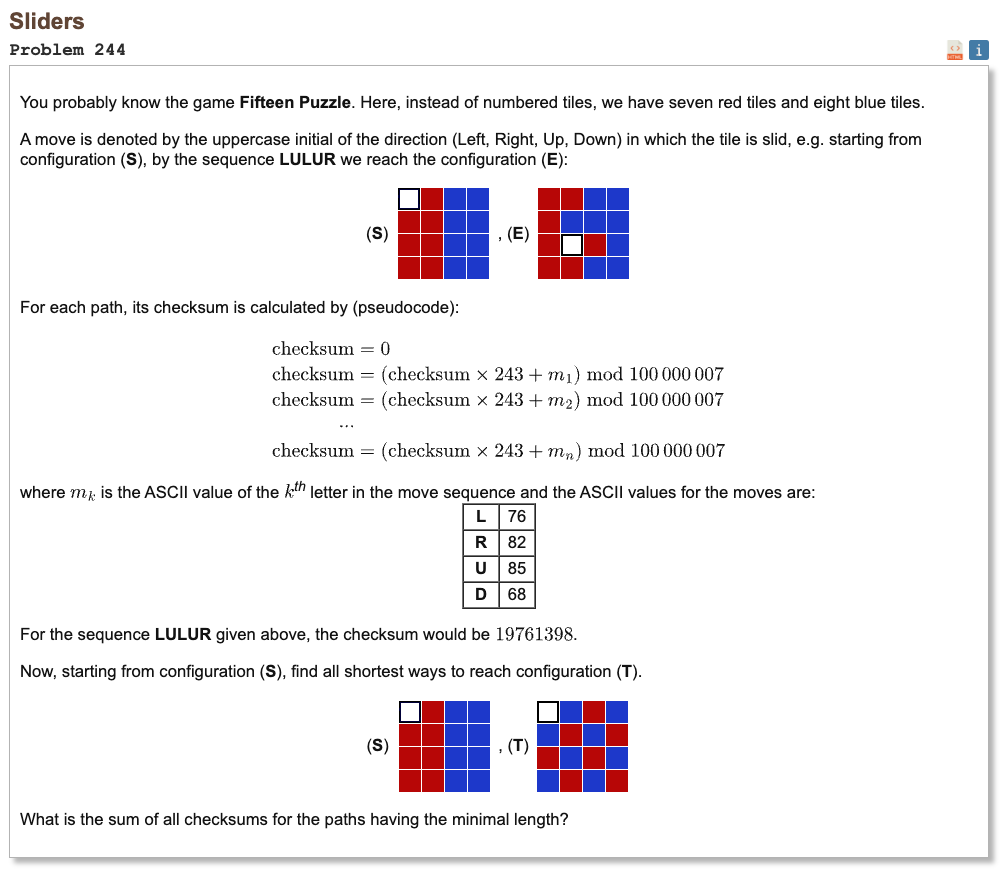

## Initial approach

* model each board as a 16 character string over r, b, and . for the empty space
* the start board is .rbbrrbbrrbbrrbb and the target board is .brbbrbrrbrbbrbr
* do a breadth first search because we only care about shortest paths
* for each state keep two things, the shortest distance to reach it and the sum of checksums of all shortest paths that reach it
* when you discover a new state, record its distance and its checksum sum, when you reach an already known state at the same distance, add its checksum into the stored sum
* update the checksum exactly as the statement says, checksum = (checksum * 243 + ASCII(move)) mod 100000007  ￼
* the first time you reach the target you learn the minimal distance, then you only need to finish processing the rest of that same BFS layer
* the final answer is the stored checksum sum for the target state

In [1]:
from collections import deque

MOD = 100000007

def solve():
    start = ".rbbrrbbrrbbrrbb"
    target = ".brbbrbrrbrbbrbr"

    ascii_move = {"L": 76, "R": 82, "U": 85, "D": 68}

    delta = {
        "L": (0, 1),
        "R": (0, -1),
        "U": (1, 0),
        "D": (-1, 0),
    }

    dist = {start: 0}
    sums = {start: 0}

    q = deque([start])
    target_dist = None

    while q:
        s = q.popleft()
        d = dist[s]
        if target_dist is not None and d > target_dist:
            break

        z = s.index(".")
        r0, c0 = divmod(z, 4)

        for mv, (dr, dc) in delta.items():
            r1 = r0 + dr
            c1 = c0 + dc
            if not (0 <= r1 < 4 and 0 <= c1 < 4):
                continue

            j = r1 * 4 + c1
            lst = list(s)
            lst[z], lst[j] = lst[j], lst[z]
            ns = "".join(lst)

            ncs = (sums[s] * 243 + ascii_move[mv]) % MOD
            nd = d + 1

            if ns not in dist:
                dist[ns] = nd
                sums[ns] = ncs
                q.append(ns)
                if ns == target and target_dist is None:
                    target_dist = nd
            else:
                if dist[ns] == nd:
                    sums[ns] = (sums[ns] + ncs) % MOD

    return sums.get(target, 0) % MOD

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 96356848
CPU times: user 139 ms, sys: 4.9 ms, total: 144 ms
Wall time: 144 ms
